In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [231]:
df = pd.read_csv("QL.csv")

In [232]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.957424,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.926402,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.956709,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.931072,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.941608,no


## Data Preprocessing

In [233]:
# Renamin dependent variable y according to convenience as Subscription
df.rename(columns={"y": "Subscription"},inplace = True)


In [234]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [236]:
df.isna()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,Subscription
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


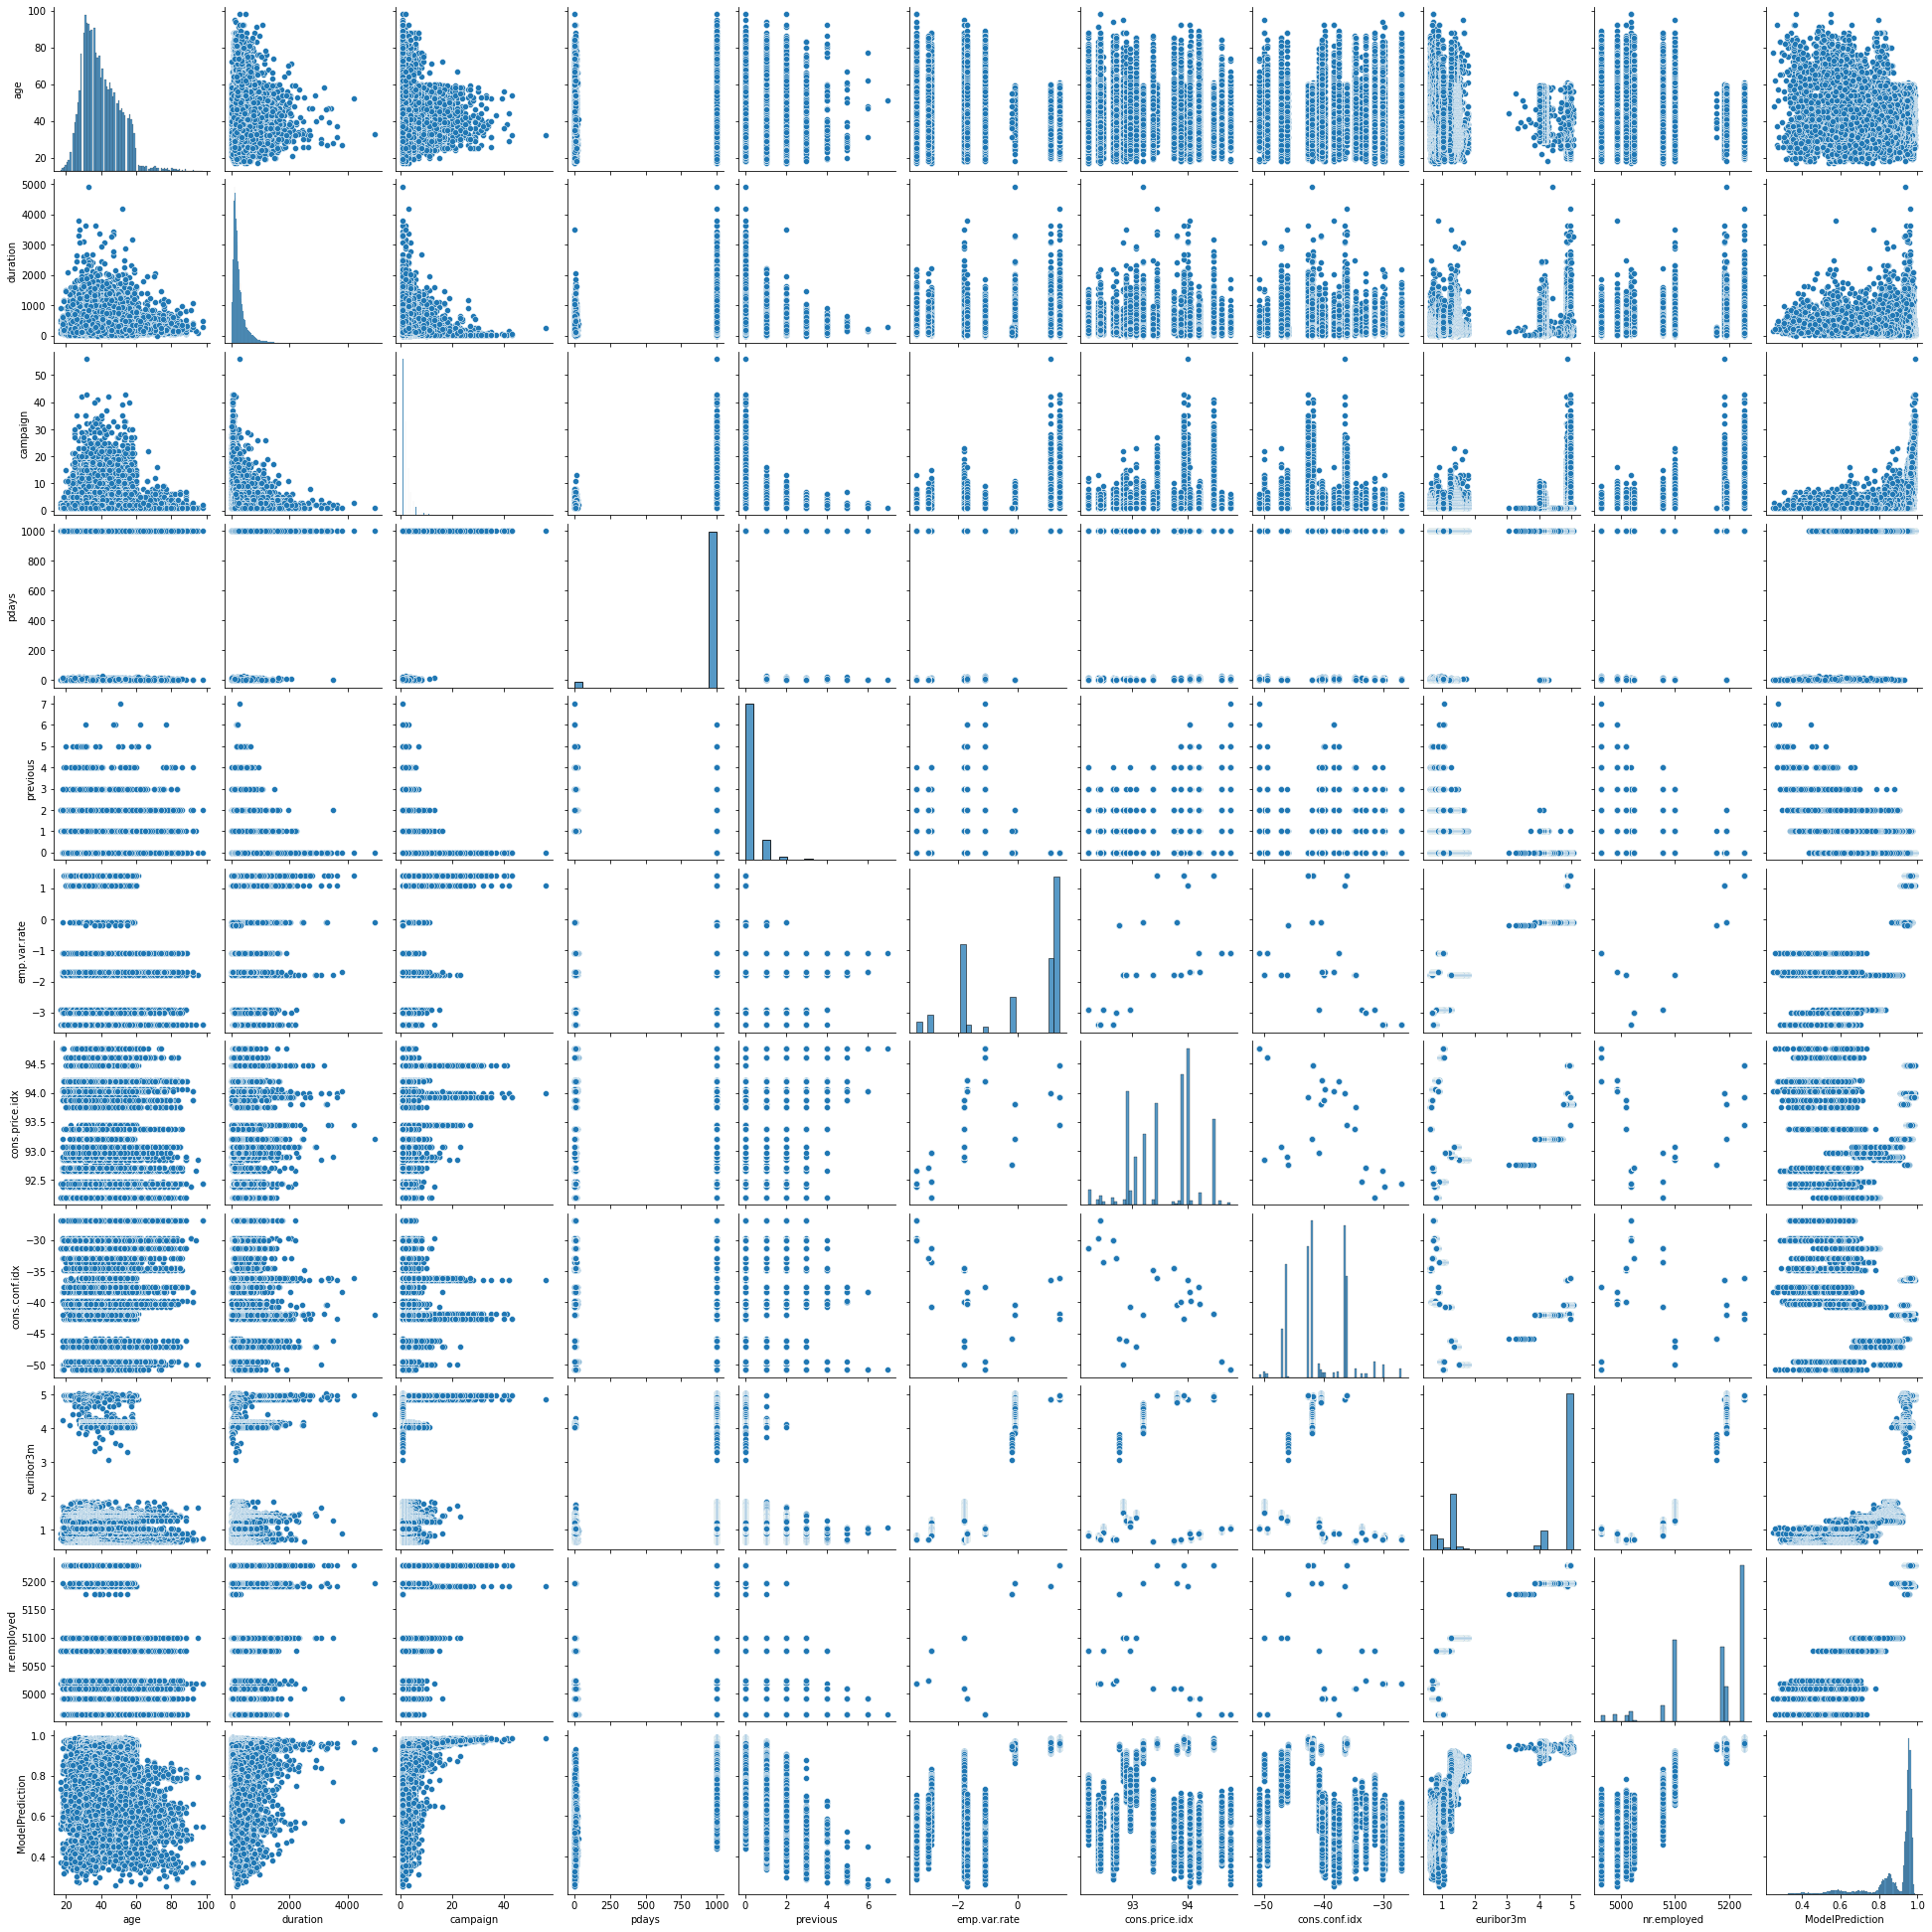

In [237]:
sns.pairplot(df)

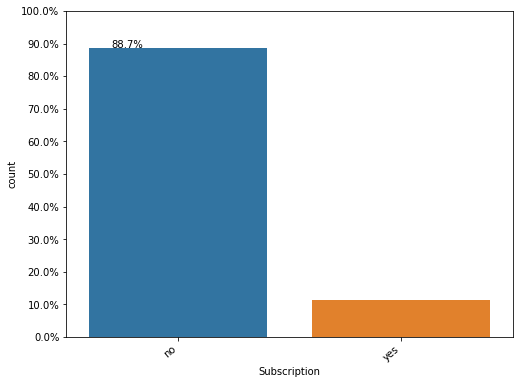

In [238]:
# Checking how dependent variable "Subscription" is divided
plt.figure(figsize=(8,6))
Y = df['Subscription']
total = len(Y)*1.
ax=sns.countplot(x="Subscription", data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

# As we Can see  in above bargraph our data is imbalance as more than 80% of the  subscription value is no and few of them are yes.

In [239]:
data_duplicate = df[df.duplicated(keep="last")]
data_duplicate

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,Subscription
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0.945200,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0.956465,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.956728,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0.961048,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0.955202,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0.970002,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0.956788,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0.932301,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0.842341,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0.827244,no


In [240]:
data_duplicate.shape

(12, 22)

In [241]:
df = df.drop_duplicates()
df.shape

(41176, 22)

## Exploratory Data Analysis

### Checking  how  different features like age, job related to Subscription(dependent variable ) by ploting count plot with and without dependent variable

In [242]:
# Countplot by Job

%matplotlib inline

def countplot_withSub(label, dataset):
    plt.figure(figsize=(20,10))
    Y = df[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=df, hue="Subscription")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
    plt.show()

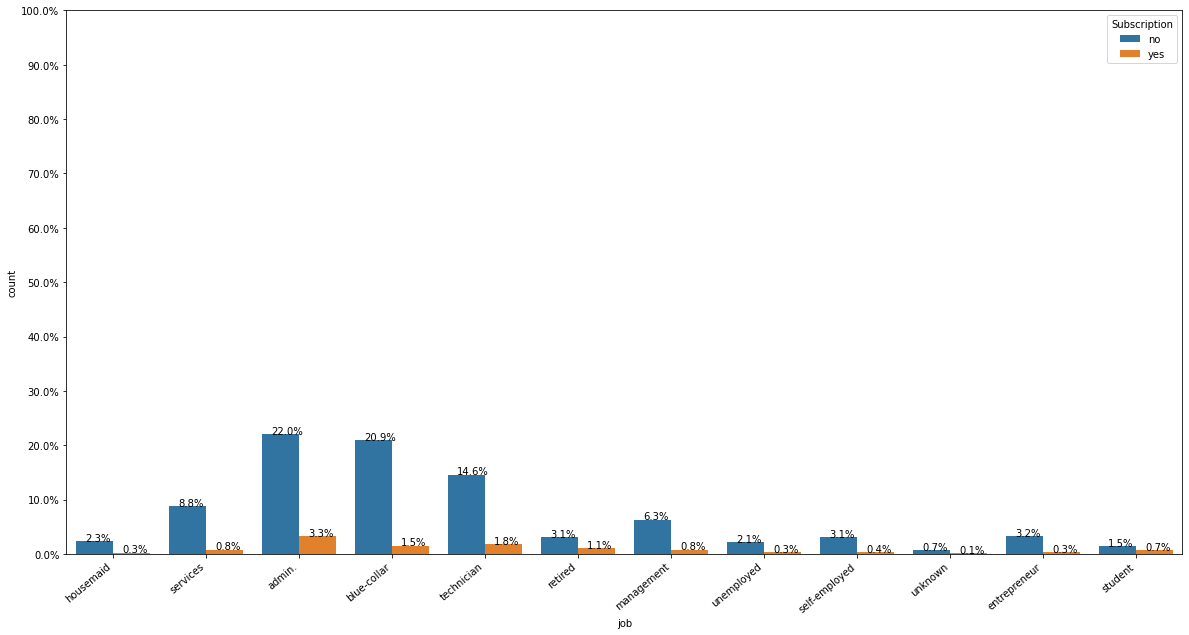

In [243]:
countplot_withSub('job', df)

### From above countplot we can see that Job role as admin has highest number of subscriber as well non subscriber Let's Check why

In [244]:
   def countplot(label, dataset):
        plt.figure(figsize=(15,10))
        Y = df[label]
        total = len(Y)*1.
        ax=sns.countplot(x=label, data=df)
        for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
        ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
        ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
        plt.show()

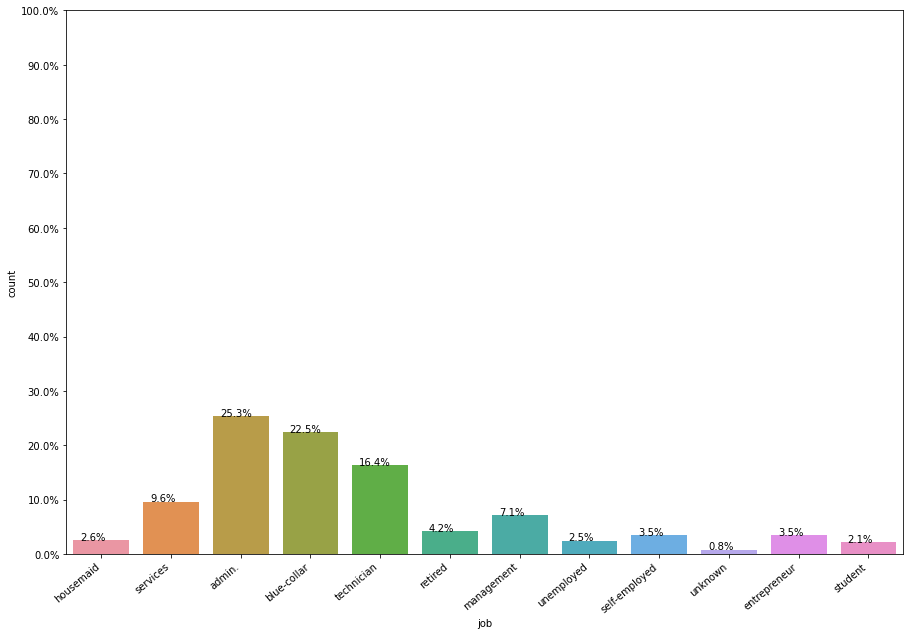

In [245]:
countplot('job',df)

### From  above plot it's clear that there are more number of people who work as admin in comparison other profession. At this point we are not sure is profession is directly correlated with subscription.

## Similarly lets find out other feature dependency with out dependent variable "Subscription"

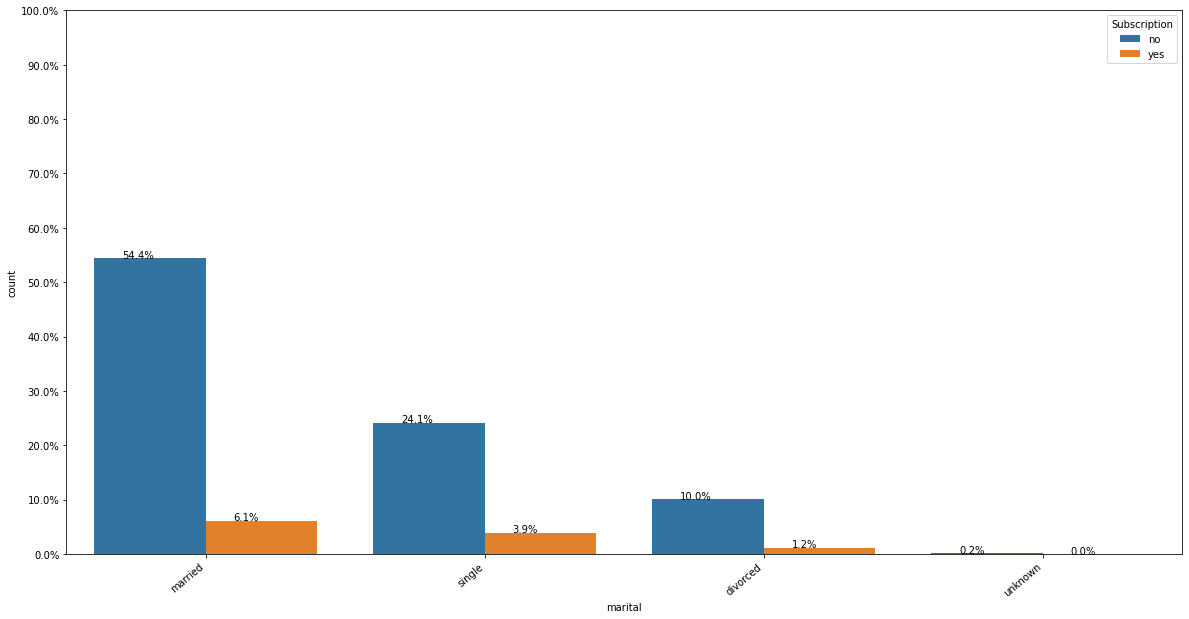

In [246]:
countplot_withSub('marital', df)

# Similar kind of pattern is seen in  marital status

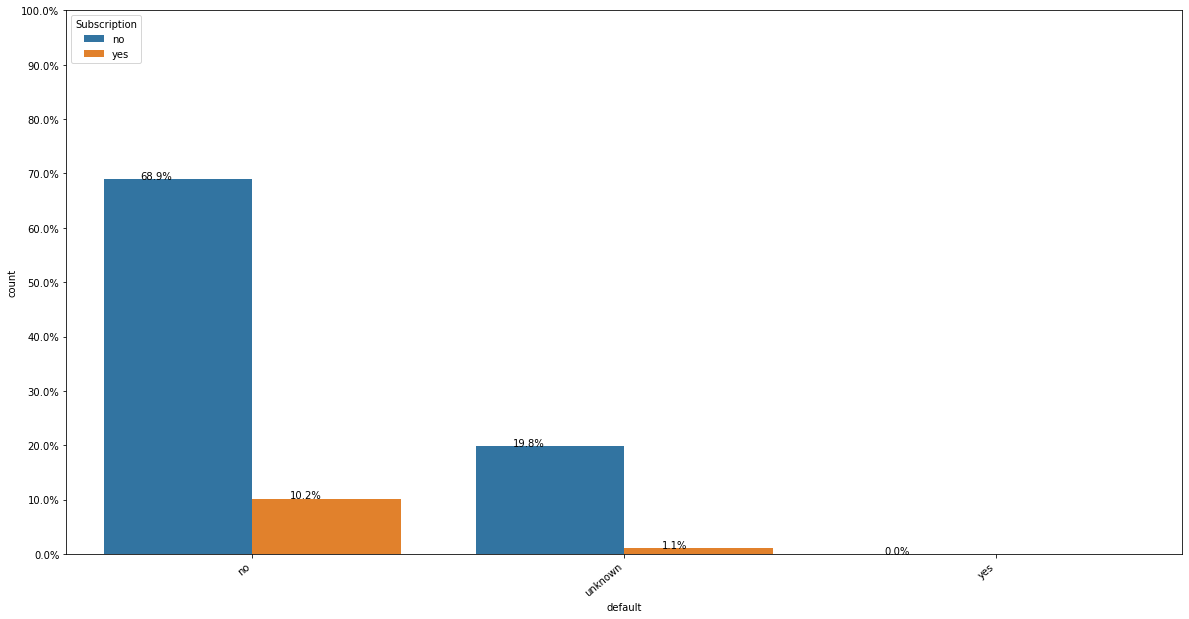

In [247]:
countplot_withSub('default', df)

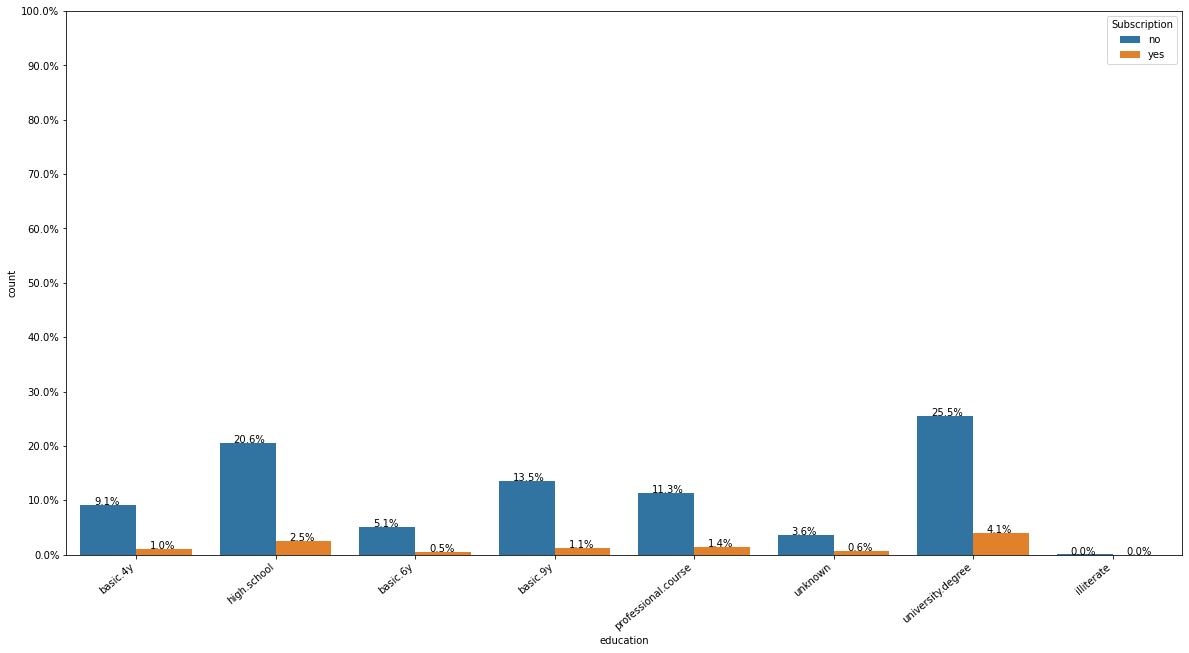

In [248]:
# Feature Education

countplot_withSub('education', df)

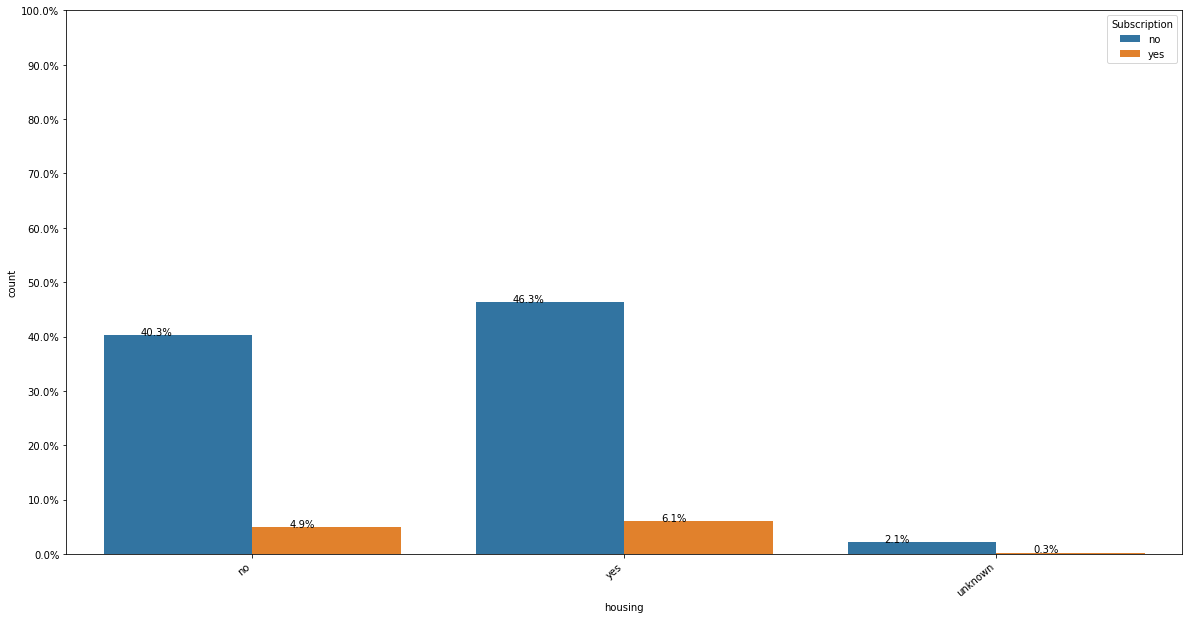

In [249]:
# Housing Loan
countplot_withSub("housing", df)

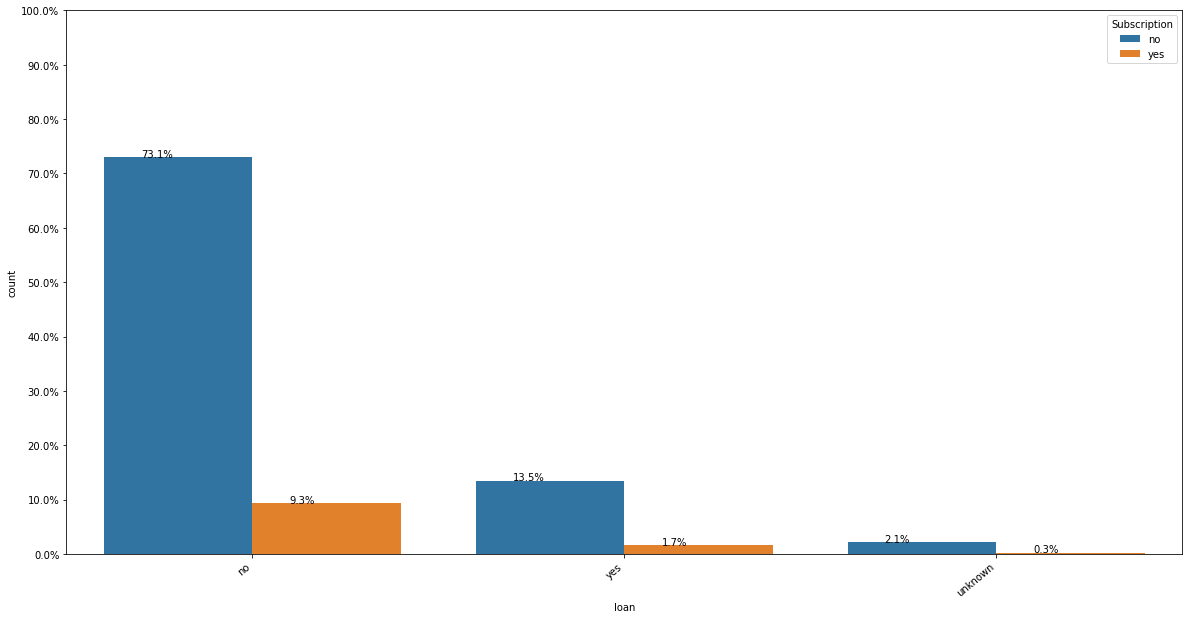

In [250]:
# Personal Loan


countplot_withSub("loan", df)

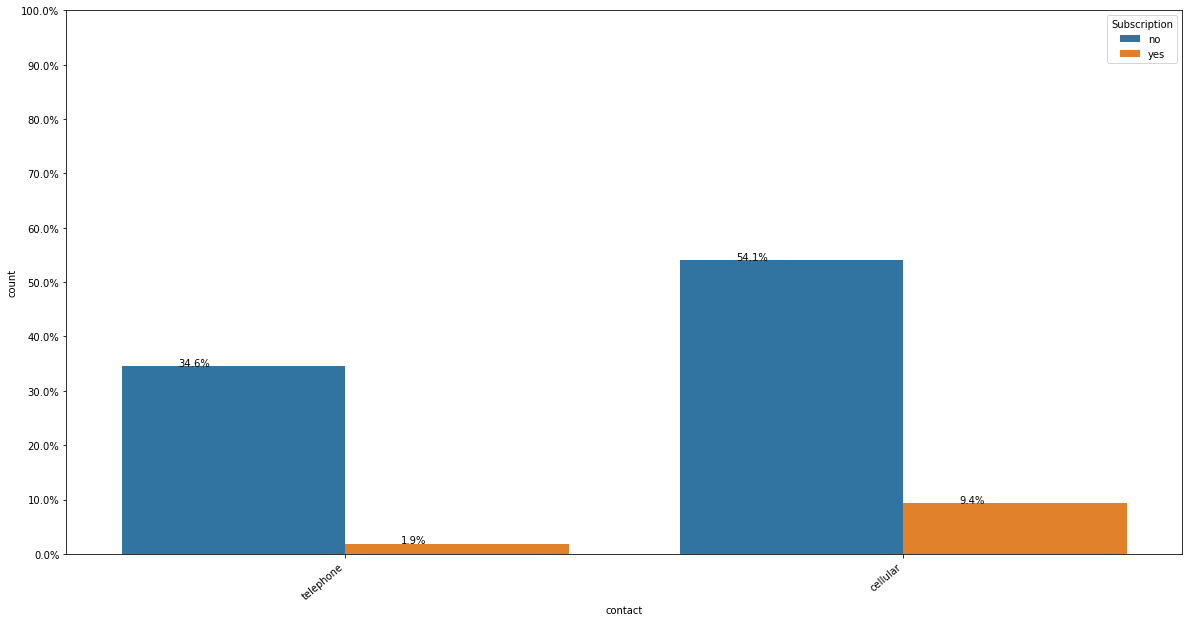

In [251]:
# Type of Communication

countplot_withSub("contact", df)

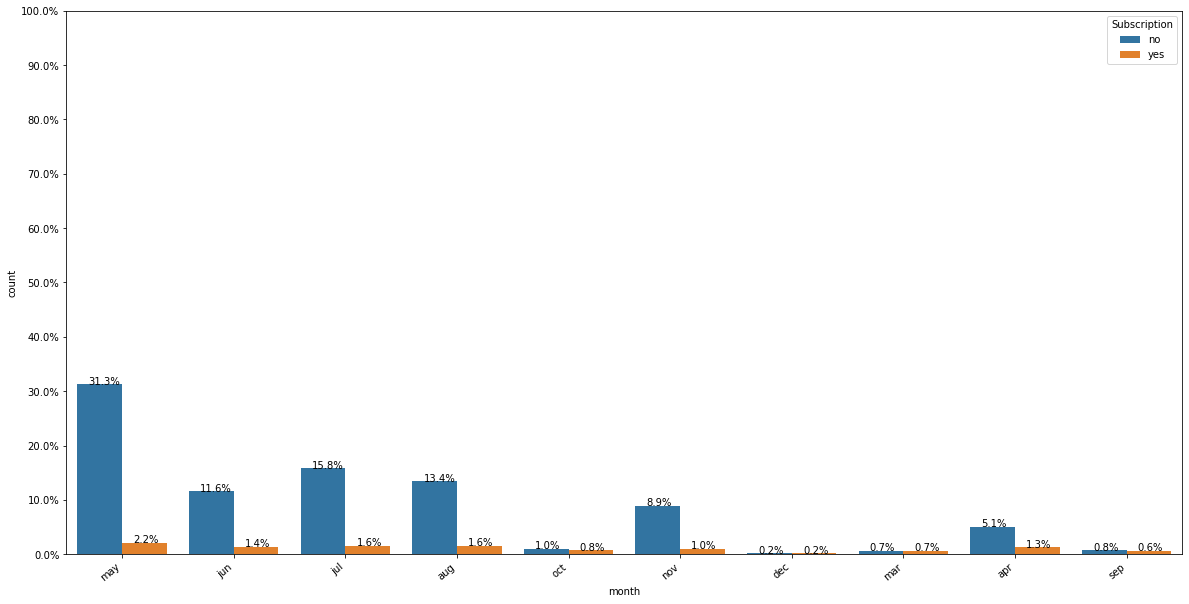

In [252]:
countplot_withSub("month", df)

# Best mont to contact is  May, July & Aug 

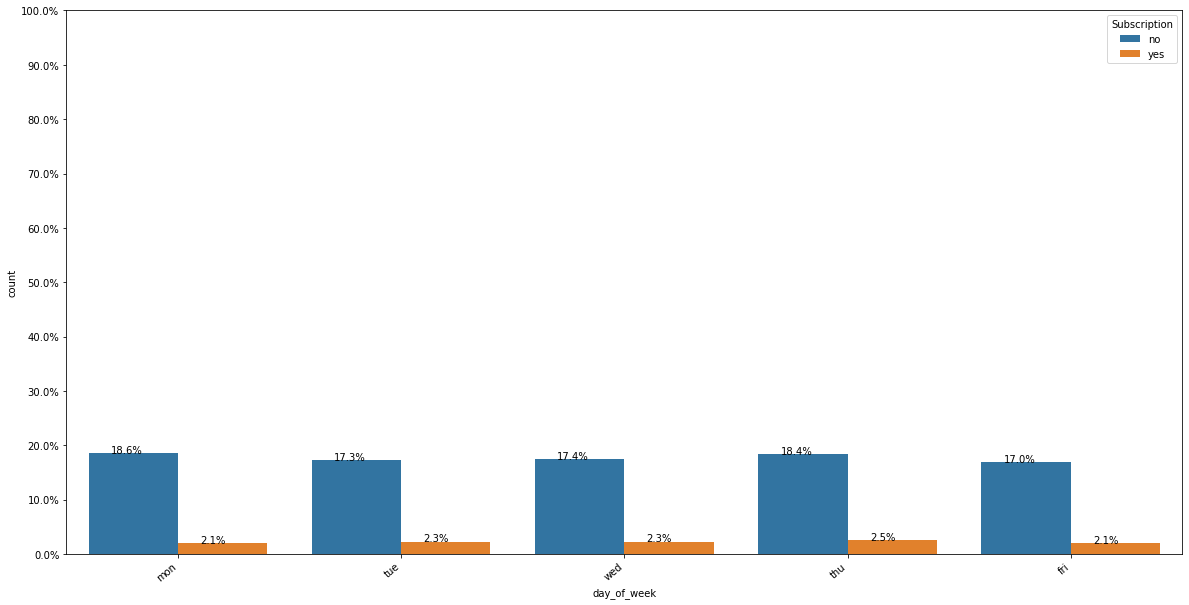

In [253]:
countplot_withSub("day_of_week", df)

# Thursday comes out to be the best day 

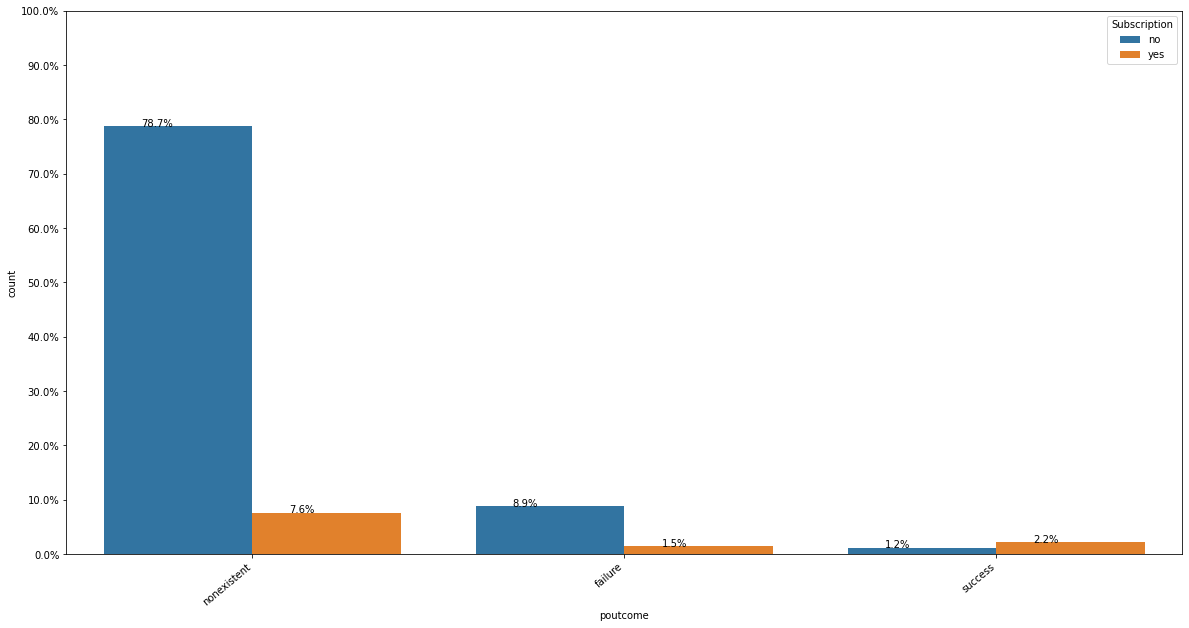

In [254]:
# Previous marketing campaign out come

countplot_withSub("poutcome", df)

In [255]:
# Dealing wirh numeric features

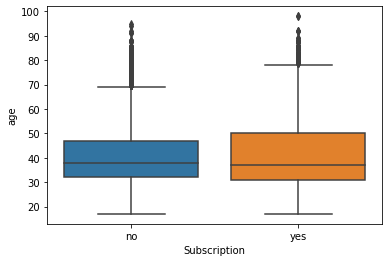

In [256]:
%matplotlib inline
sns.boxplot(data=df, x="Subscription", y="age")
plt.show()

In [257]:
# From above box plot picture is quite unclear 

<AxesSubplot:xlabel='age', ylabel='Density'>

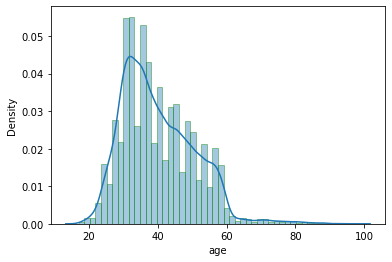

In [258]:
sns.distplot(df['age'], hist = True, hist_kws = {'edgecolor':'green'})

Text(0.5, 1.05, 'Feature Corrleation')

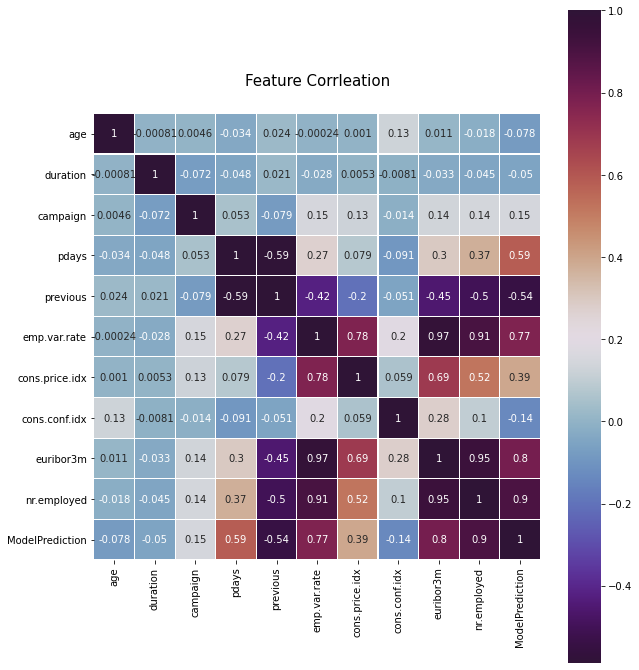

In [259]:
# Heatmap
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="twilight_shifted", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Feature Corrleation", y=1.05, size=15)

In [260]:
# From above heat map we can see that features like nr.employed, euribor3m share high correlation value of .95 and kind of similar ones too

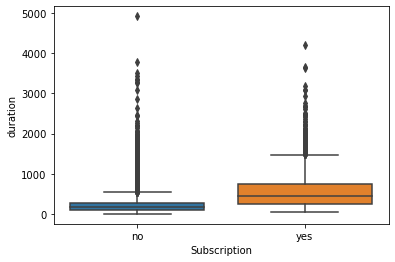

In [261]:
# As from statement and dataset duration can be an important factor to be seen

%matplotlib inline
sns.boxplot(data=df, x="Subscription", y="duration")
plt.show()

# Train - Test Split

In [262]:
df_x = df.iloc[:, :-1]
df_x.drop('ModelPrediction',inplace = True, axis =1)
print("Shape of X:", df_x.shape)
df_y = df["Subscription"]
print("Shape of Y:", df_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


In [263]:
# Categorical boolean mask
categorical_feature_mask = df_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df_x.columns[categorical_feature_mask].tolist()

In [264]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [265]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(df_x, df_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [266]:
# Replacing"no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [267]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
        temp_cols = Vectorizer.transform(X_cv[i])
        X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [268]:

OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
Shape of train:  (26352, 63)
Shape of CV:  (6588, 63)
Shape of test:  (8236, 63)


In [269]:
## Model Building
# Logistic Regression

SyntaxError: invalid syntax (<ipython-input-269-bb18a19ecf92>, line 3)

In [270]:
 #Modelling with Duration

#Seeing how the model performs with the "duration" feature.
#It is keep in mind that the duration feature can not be included in the final model as it is highly correlated 


# with "duration" column
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_auc = model.predict_proba(X_test)


print("AUC score with duration column: ", roc_auc_score(y_test, y_pred_auc[:,1]))

AUC score with duration column:  0.9279675803818966


In [271]:
# Confusion Matrix with duration



data = {'y_Actual':    list(y_test),
        'y_Predicted': list(y_pred)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

Predicted     0     1
Actual               
0          6181  1121
1           117   817


0.8704097377606393

In [ ]:
##Removing "Duration" feature duration: last contact duration, in seconds (numeric).



In [272]:
# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (26352, 62)
The shape of the cv dataset:  (6588, 62)
The shape of the test dataset:  (8236, 62)


In [273]:
# without "duration" column
# X_train = X_train.drop("duration", axis=1)
# X_test = X_test.drop("duration", axis=1)

# print(X_train.shape)
# print(X_test.shape)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_auc = model.predict_proba(X_test)

print("AUC score without duration column: ", roc_auc_score(y_test, y_pred_auc[:,1]))

AUC score without duration column:  0.7781690739740424


In [ ]:
# without "duration" column and without class balancing
#model = LogisticRegression()
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#y_pred_auc = model.predict_proba(X_test)

#print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred_auc[:,1]))

In [274]:
## Confusion Matrix and F1 Score with class balancing
data = {'y_Actual':    list(y_test),
        'y_Predicted': list(y_pred)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

Predicted     0     1
Actual               
0          6032  1270
1           328   606


0.831806516974113

In [275]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [276]:
# KNN

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

AUC for k =  1 is 0.6725233410959366
AUC for k =  3 is 0.731499071673328
AUC for k =  5 is 0.7475860183300113
AUC for k =  7 is 0.7544702579077367
AUC for k =  9 is 0.7612679789522756
AUC for k =  11 is 0.7672169016189164
AUC for k =  13 is 0.7693957935262136
AUC for k =  15 is 0.7713498518413092
For values of best alpha =  15 The train AUC is: 0.8663288041645186
For values of best alpha =  15 The cross validation AUC is: 0.7713498518413092
For values of best alpha =  15 The test AUC is: 0.7758170446394376


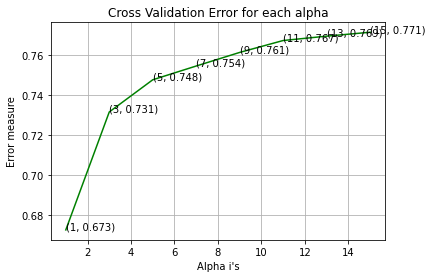

In [281]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
#plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))





In [282]:
y_pred = k_cfl.predict(X_test)
y_pred_auc = k_cfl.predict_proba(X_test)

print("AUC score without duration column : ", roc_auc_score(y_test, y_pred_auc[:,1]))

AUC score without duration column :  0.7704485497798556


In [283]:
## Confusion Matrix and F1 Score KNN
data = {'y_Actual':    list(y_test),
        'y_Predicted': list(y_pred)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

Predicted     0    1
Actual              
0          7159  143
1           710  224


0.8757969100074539

In [284]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
r_cfl=RandomForestClassifier(n_estimators= 100,random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)



RandomForestClassifier(n_jobs=-1, random_state=42)

In [285]:
y_pred=r_cfl.predict(X_test)

In [286]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8918164157357941


In [287]:
y_pred_auc = r_cfl.predict_proba(X_test)

print("AUC score without duration column and class balancing: ", roc_auc_score(y_test, y_pred_auc[:,1]))

AUC score without duration column and class balancing:  0.7639938487416841


In [288]:
# Confusion Matrix Random Forest

data = {'y_Actual':    list(y_test),
        'y_Predicted': list(y_pred)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

Predicted     0    1
Actual              
0          7086  216
1           675  259


0.8758435998654904

In [289]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8758435998654904

In [290]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Removing duration feature 



In [291]:
# AUC for Random Forest
alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
 

In [ ]:
## Feature Importance

<AxesSubplot:>

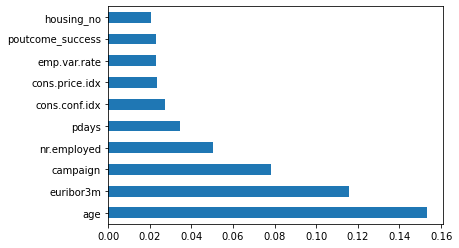

In [292]:
importances = pd.Series(r_cfl.feature_importances_, index = X_train.columns)
importances.nlargest(10).plot(kind = 'barh')


In [ ]:
pd.Series(importances, index = X_train.columns).plot(kind = 'barh')